In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
df = pd.read_csv("POC_PRED_MUES.csv")

In [4]:
mean_mues = df.groupby(by="Num_trained").mean()["MUE"].values
mean_mues = np.nan_to_num(mean_mues, nan=9)
mean_mues = np.minimum.accumulate(mean_mues)
mean_mues

array([9.        , 2.3748    , 1.93146667, 1.93146667, 1.26926667,
       1.26926667, 1.15235714, 1.15235714, 1.0912    , 1.0912    ,
       1.0912    , 1.0912    , 1.03313333, 0.94913333, 0.94913333,
       0.94913333, 0.94913333, 0.94913333, 0.94913333, 0.94913333,
       0.94913333, 0.94913333])

In [5]:
x_vals = list(range(len(mean_mues)))

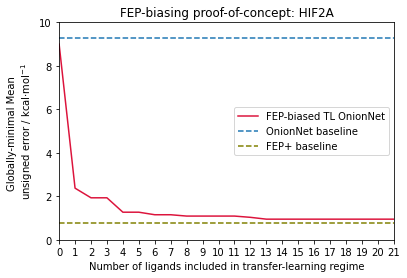

In [6]:
plt.plot(mean_mues, label="FEP-biased TL OnionNet", color="crimson")
plt.axhline(9.28, label="OnionNet baseline", ls="--")
plt.axhline(0.78, label="FEP+ baseline", ls="--", color="olive")

plt.xlim(0, 20)
plt.ylim(0, 10)
plt.legend()
plt.xticks(x_vals)
plt.title("FEP-biasing proof-of-concept: HIF2A")
plt.xlabel("Number of ligands included in transfer-learning regime")
plt.ylabel("Globally-minimal Mean \nunsigned error / kcal$\cdot$mol$^{-1}$")

plt.savefig("POC_PLOT.png",dpi=300)
plt.show()